In [1]:
# import statements 

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.parser import parse
from pandas.plotting import lag_plot

In [2]:
# set options

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Load Data

In [3]:
# loading Data
dfInput=pd.read_csv(os.getcwd()+'\SBI_Historical_Data.csv')

dfInput.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


#  Basic Details

In [4]:
# shape

dfInput.shape

(1385, 7)

In [5]:
# DataTypes

dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


Coclusion :- The datatypes of features "Date","Vol" and "change" need to change to float. And we need to change the column name Vol. We need tochange the format of Date ,Vol and change.

In [6]:
# changing the column name of feature 
dfInput.rename(columns={'Vol.':'Vol','Change %':'Change'},inplace=True)

# checking the column names after updating the column name
dfInput.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change'], dtype='object')

In [7]:
# changing the column format and datatype


dfInput['Date']=dfInput['Date'].apply(lambda x :parse(x))

dfInput.head()


,Date,Price,Open,High,Low,Vol,Change
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


In [8]:
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1385 non-null   datetime64[ns]
 1   Price   1385 non-null   float64       
 2   Open    1385 non-null   float64       
 3   High    1385 non-null   float64       
 4   Low     1385 non-null   float64       
 5   Vol     1385 non-null   object        
 6   Change  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [9]:
# changing the content of Vol and Change 



dfInput['Vol']=dfInput['Vol'].apply(lambda x :x.replace('M'," "))

dfInput['Change']=dfInput['Change'].apply(lambda x :x.replace('%'," "))

dfInput.head()

,Date,Price,Open,High,Low,Vol,Change
0,2020-08-07,190.65,191.45,192.10,189.55,44.82,-0.16
1,2020-08-06,190.95,192.30,194.50,190.25,59.74,-0.26
2,2020-08-05,191.45,192.75,196.85,191.00,68.89,-0.08
3,2020-08-04,191.60,193.35,193.80,190.50,43.87,-0.34
4,2020-08-03,192.25,192.00,194.60,190.05,72.46,0.42


In [10]:
# changing the datatype of VOL and Change



# we could find a missmatched record in Vol as '-'.
# removing the same

dfInput.drop(dfInput[dfInput['Vol']=='-'].index,inplace=True)

columns=['Vol','Change']


for col in columns:

    dfInput[col]=dfInput[col].astype('float64')



In [11]:
# rechecking the datatype
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1384 non-null   datetime64[ns]
 1   Price   1384 non-null   float64       
 2   Open    1384 non-null   float64       
 3   High    1384 non-null   float64       
 4   Low     1384 non-null   float64       
 5   Vol     1384 non-null   float64       
 6   Change  1384 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 86.5 KB


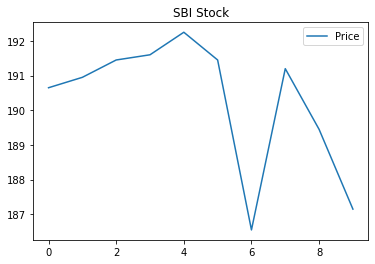

In [12]:
# ploting the trend for change

dfInput[['Price']].head(10).plot()
plt.title("SBI Stock")
plt.show()

Text(0.5, 1.0, 'SBI Cumulative Returns')

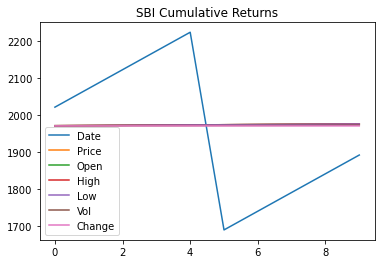

In [13]:
# Comulative Return

dfInput.head(10).cumsum().plot()
plt.title('SBI Cumulative Returns')

Text(0.5, 1.0, 'SBI Autocorrelation plot')

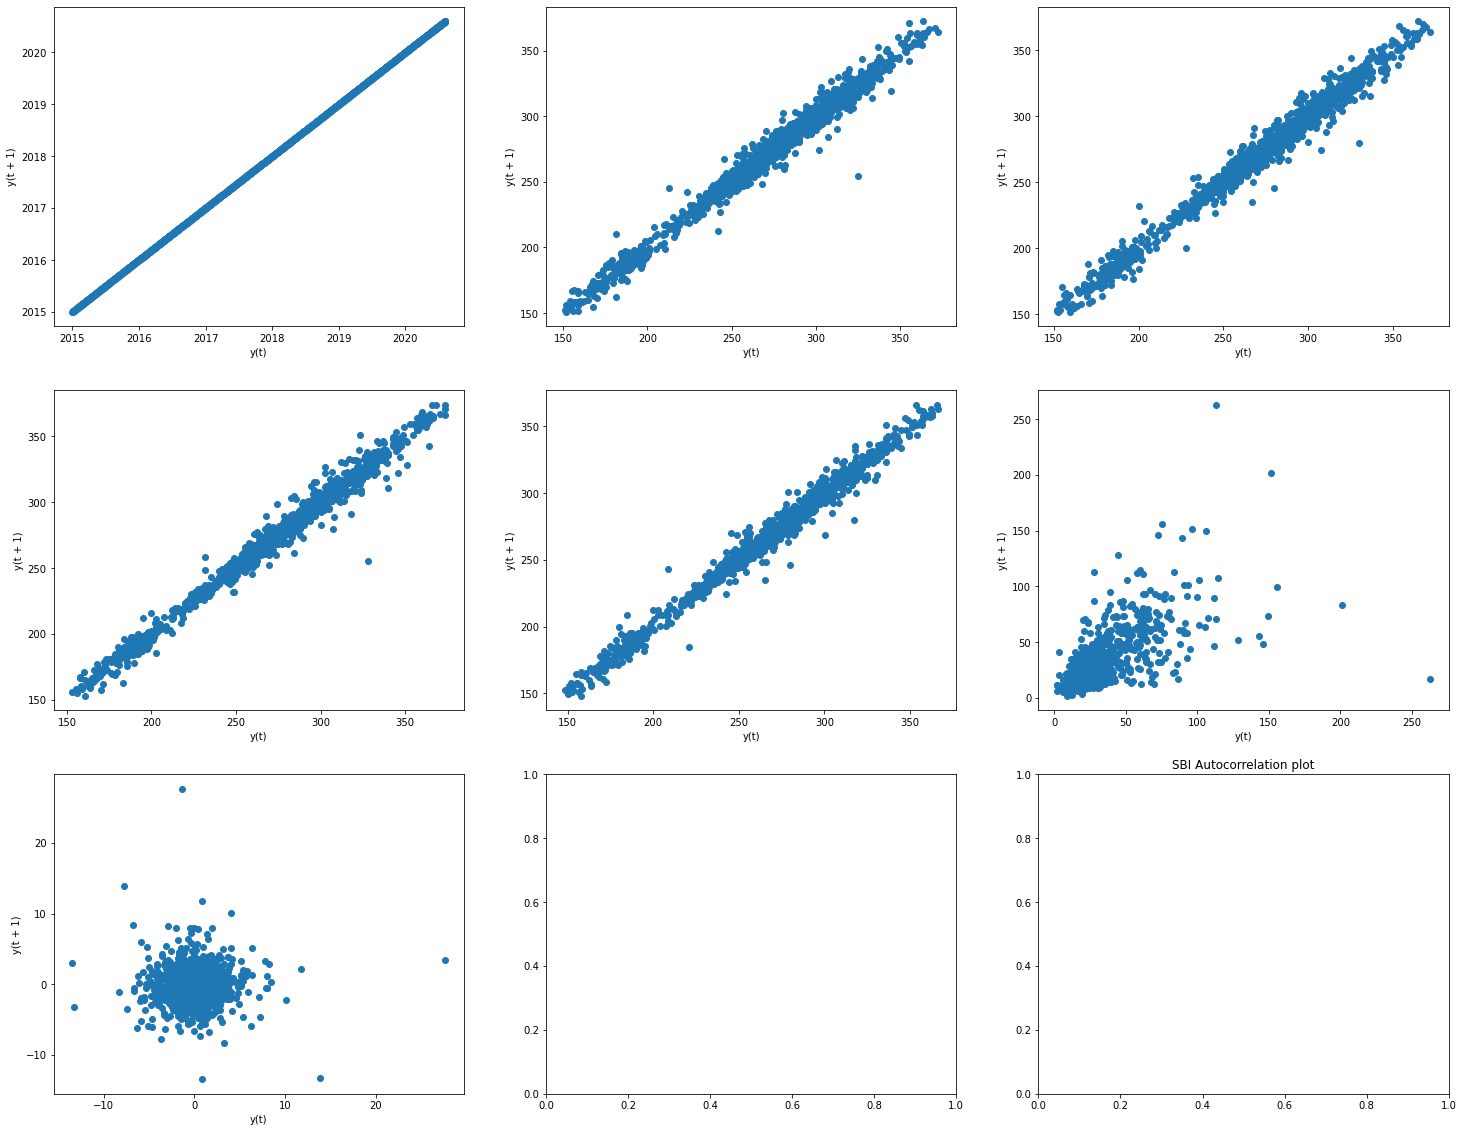

In [14]:



fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))


for variable, subplot in zip(dfInput, ax.flatten()):
    
    
    lag_plot(dfInput[variable], ax = subplot)


plt.title('SBI Autocorrelation plot')

#  Summary Statistics

In [15]:
# checking the shape
dfInput.shape

(1384, 7)

In [16]:
# checking the statistics
dfInput.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1384.0,266.263186,45.569830,150.85,245.5875,270.750,296.1750,372.40
Open,1384.0,266.892449,45.605383,151.95,245.8875,271.100,296.5250,371.95
High,1384.0,270.335405,45.845276,153.20,248.7750,274.550,300.7500,373.80
Low,1384.0,262.744147,45.261792,148.25,242.5125,267.375,292.2625,366.20
Vol,1384.0,25.295275,21.576224,2.06,13.0125,18.245,28.1175,262.68
Change,1384.0,-0.008721,2.338089,-13.46,-1.2325,-0.020,1.1700,27.69


In [17]:
# checking null values

nullValueCount=dfInput.isnull().sum().sort_values(ascending=False)

nullValuePercentage=dfInput.isnull().sum()*100/dfInput.isnull().count().sort_values(ascending=False)

dfMissingValues=pd.concat([nullValueCount,nullValuePercentage],axis=1,keys=['Count','Percentage'])

dfMissingValues

,Count,Percentage
Change,0,0.0
Vol,0,0.0
Low,0,0.0
High,0,0.0
Open,0,0.0
Price,0,0.0
Date,0,0.0


In [18]:
# getting the age limit

print(dfInput['Date'].min(),dfInput['Date'].max())

2015-01-01 00:00:00 2020-08-07 00:00:00


In [19]:
# dropping all other columns other than 'Date' and 'Price'
dfInput.drop(dfInput.iloc[:,2:],axis=1,inplace=True)

In [20]:
dfInput.isnull().sum()

Date     0
Price    0
dtype: int64

In [21]:
len(dfInput['Date'].unique())

1384

In [22]:
# year wise and month wise sum of price


MonthlySales=dfInput.groupby('Date')['Price'].sum().reset_index()
MonthlySales

,Date,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75
3,2015-01-06,299.90
4,2015-01-07,300.15
5,2015-01-08,304.85
6,2015-01-09,303.20
7,2015-01-12,307.10
8,2015-01-13,305.10
9,2015-01-14,304.70


In [23]:
MonthlySales.index

RangeIndex(start=0, stop=1384, step=1)

In [24]:
MonthlySales['Date'] = pd.to_datetime(dfInput['Date'])
MonthlySales.set_index('Date', inplace=True)
MonthlySales.index

DatetimeIndex(['2020-08-07', '2020-08-06', '2020-08-05', '2020-08-04',
               '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-29',
               '2020-07-28', '2020-07-27',
               ...
               '2015-01-15', '2015-01-14', '2015-01-13', '2015-01-12',
               '2015-01-09', '2015-01-08', '2015-01-07', '2015-01-06',
               '2015-01-05', '2015-01-02'],
              dtype='datetime64[ns]', name='Date', length=1384, freq=None)

# Data visualization

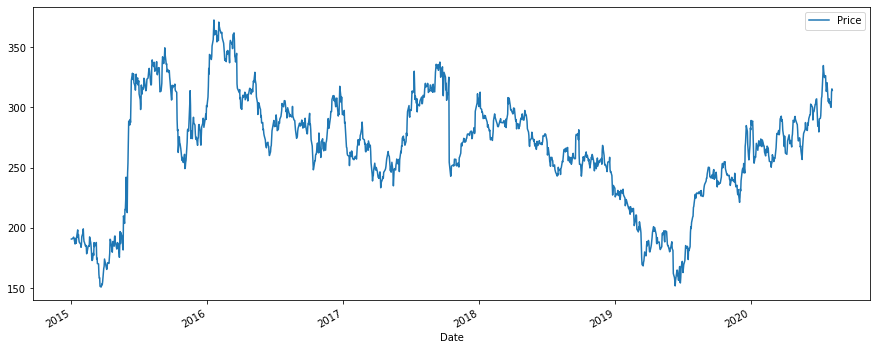

In [25]:
MonthlySales.plot(figsize=(15, 6))
plt.show()

# Sampling

In [26]:
y = MonthlySales['Price'].resample('MS').mean()
y

Date
2015-01-01    190.352500
2015-02-01    184.710000
2015-03-01    167.640476
2015-04-01    180.218421
2015-05-01    196.070000
2015-06-01    301.147727
2015-07-01    318.052174
2015-08-01    328.669048
2015-09-01    329.685000
2015-10-01    284.272500
2015-11-01    277.860526
2015-12-01    281.659091
2016-01-01    345.145000
2016-02-01    353.040476
2016-03-01    338.042500
2016-04-01    309.322222
2016-05-01    305.793182
2016-06-01    273.327273
2016-07-01    293.545000
2016-08-01    290.338636
2016-09-01    284.720000
2016-10-01    267.434211
2016-11-01    276.200000
2016-12-01    303.711364
2017-01-01    268.257143
2017-02-01    270.628947
2017-03-01    257.093182
2017-04-01    244.808333
2017-05-01    251.804545
2017-06-01    275.938095
2017-07-01    307.561905
2017-08-01    313.985714
2017-09-01    327.073810
2017-10-01    277.457500
2017-11-01    264.945455
2017-12-01    284.712500
2018-01-01    292.984091
2018-02-01    283.892105
2018-03-01    293.607895
2018-04-01    290.03

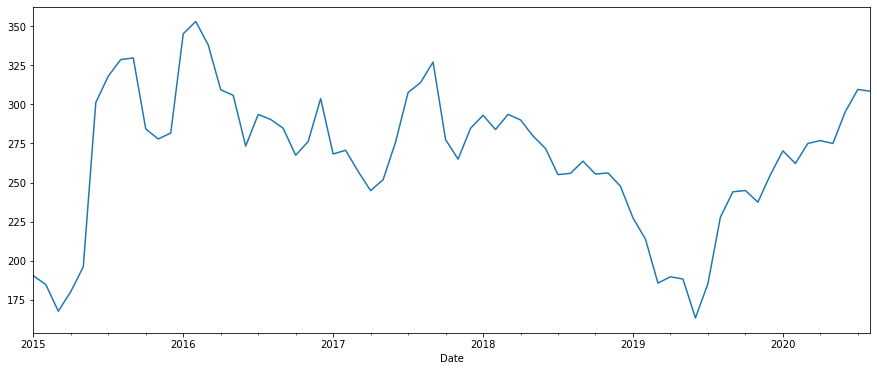

In [27]:
y.plot(figsize=(15, 6))
plt.show()

In [28]:
y

Date
2015-01-01    190.352500
2015-02-01    184.710000
2015-03-01    167.640476
2015-04-01    180.218421
2015-05-01    196.070000
2015-06-01    301.147727
2015-07-01    318.052174
2015-08-01    328.669048
2015-09-01    329.685000
2015-10-01    284.272500
2015-11-01    277.860526
2015-12-01    281.659091
2016-01-01    345.145000
2016-02-01    353.040476
2016-03-01    338.042500
2016-04-01    309.322222
2016-05-01    305.793182
2016-06-01    273.327273
2016-07-01    293.545000
2016-08-01    290.338636
2016-09-01    284.720000
2016-10-01    267.434211
2016-11-01    276.200000
2016-12-01    303.711364
2017-01-01    268.257143
2017-02-01    270.628947
2017-03-01    257.093182
2017-04-01    244.808333
2017-05-01    251.804545
2017-06-01    275.938095
2017-07-01    307.561905
2017-08-01    313.985714
2017-09-01    327.073810
2017-10-01    277.457500
2017-11-01    264.945455
2017-12-01    284.712500
2018-01-01    292.984091
2018-02-01    283.892105
2018-03-01    293.607895
2018-04-01    290.03

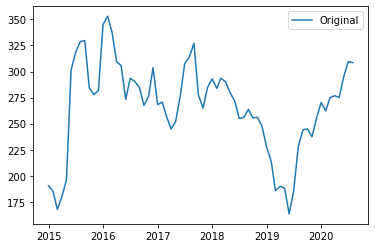

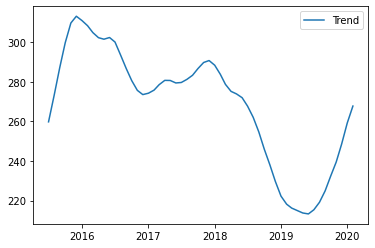

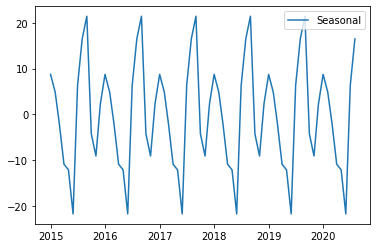

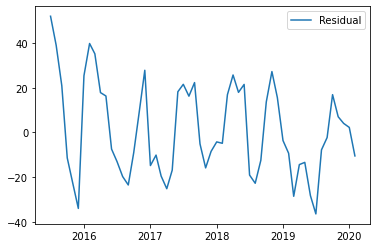

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')


seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')


residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

The plot clearly indicates that the time series has seasonality pattern.The price are always low at the middle of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

# Checking Stationarity

# 1.  ADF Test

**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
result=adfuller(y)

print('The p-value : ',result[1])

The p-value :  0.025930584731203903


**The p-value from the ADF test is less than 0.05 . So we can conclude that we reject the null hypothesis and we say that the given data is in stationary.**

 # 2.  KPSS Test

**Null Hypothesis: The series has no  unit root ( stationary)**

**Alternate Hypothesis: The series has no unit root (not stationary)**

In [32]:
from statsmodels.tsa.stattools import kpss

In [33]:
result=kpss(y)

print('The p-value : ',result[1])

The p-value :  0.1


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


**The p-value from the KPSS test is greater than the threshold 0.05.So we can conclude that we accept the null hypothesis and we can say that the given timeseries is in stationary.**

# 1.  Log Transformation


In [34]:
# if the data is not stationary we can make use of two methods to make it stationary
# 1.  log transformation 
# 2. differencing


# code

'''
data = clean_df['Sales_quantity']
result = adfuller(np.log(data)) # code for  log transformation
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

'''

"\ndata = clean_df['Sales_quantity']\nresult = adfuller(np.log(data)) # code for  log transformation\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\n\n"

# 2.  Differencing

In [35]:
'''

data = clean_df['Sales_quantity'].diff()[1:] # differencing code
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

'''

"\n\ndata = clean_df['Sales_quantity'].diff()[1:] # differencing code\nresult = adfuller(data)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\n\n"

# Time Series Forcasting using ARIMA

In [36]:
import itertools

p = d = q = [0,1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Parameter Selection

In [37]:
#We use “grid search” to find the optimal set of parameters that yields the best performance for our model
result_dict = {}
from pylab import rcParams
import statsmodels.api as sm
for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False, 
                            enforce_invertibility=False)
            results = mod.fit()

            print(results)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            result_dict[round(results.aic,0)] = str(param)+str(param_seasonal)
        
            
            
        except:
            continue

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:942.7829383901377


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was pr

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:776.8883136776701
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:623.9718269836309


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:453.50339403999124
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:640.6145377118854


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:597.8478814459257
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:462.1592902836474


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:453.3271403777082
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:846.8515384247917


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:657.8877379338577
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:563.95335880789


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:403.6251419420052


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:594.3107534651572


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:544.6445240855942


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:421.6636940053962


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:402.8810213804742
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:604.1734557919457

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:468.0814904862102
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:535.0645665692941

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:369.0572549562553
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:473.2255459588947
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:462.18981725571257

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:373.8238541777148


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:362.8402755984759
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:595.1181848065996


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:460.7874377286871
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:527.3668707964122


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:358.80696111091794
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:473.7632417844142


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:453.0913725047803


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:375.2993122669974


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provid

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:355.85388058840124
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:614.2966393692311
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:477.52255137363994
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:540.8745634150097


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:377.76051846227074

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:474.99078018136197


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:471.82067648026367

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:374.98360367084456


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:371.3880900924593
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:605.7756826673499


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:470.65477204839755
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:530.9491176804743


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:366.7952918106454


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:475.5814031070014


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:464.03121034488544


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:375.84766270885956


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:363.70814644296377
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:603.7357992864422


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:469.3143411821043
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:536.0740176924505


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:368.1019724671649
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:466.53289685492905


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:463.0199907521554
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:367.8056537488603


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:363.83588435898645
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:597.0762064916229


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:460.5378995488995
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:529.0901189696904


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:359.15263362918716


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:466.1847968951979


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:453.5182945327411


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:367.53796708822216


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:356.3446631105709


In [38]:
# getting the result with sorted order
print(sorted(result_dict.keys()))

[356.0, 359.0, 363.0, 364.0, 367.0, 368.0, 369.0, 371.0, 374.0, 375.0, 376.0, 378.0, 403.0, 404.0, 422.0, 453.0, 454.0, 461.0, 462.0, 463.0, 464.0, 466.0, 467.0, 468.0, 469.0, 471.0, 472.0, 473.0, 474.0, 475.0, 476.0, 478.0, 527.0, 529.0, 531.0, 535.0, 536.0, 541.0, 545.0, 564.0, 594.0, 595.0, 597.0, 598.0, 604.0, 606.0, 614.0, 624.0, 641.0, 658.0, 777.0, 847.0, 943.0]


In [39]:
# getting the optimal parameter

# We are selecting those parameter which has minimum AIC score

print(result_dict[356])

(1, 1, 1)(1, 1, 1, 12)


# Fitting the ARIMA model

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1128      1.504      0.075      0.940      -2.834       3.060
ma.L1         -0.0069      1.611     -0.004      0.997      -3.164       3.151
ar.S.L12      -0.6293      0.115     -5.463      0.000      -0.855      -0.404
ma.S.L12      -0.4328      0.271     -1.598      0.110      -0.964       0.098
sigma2       480.0360     88.502      5.424      0.000     306.576     653.496


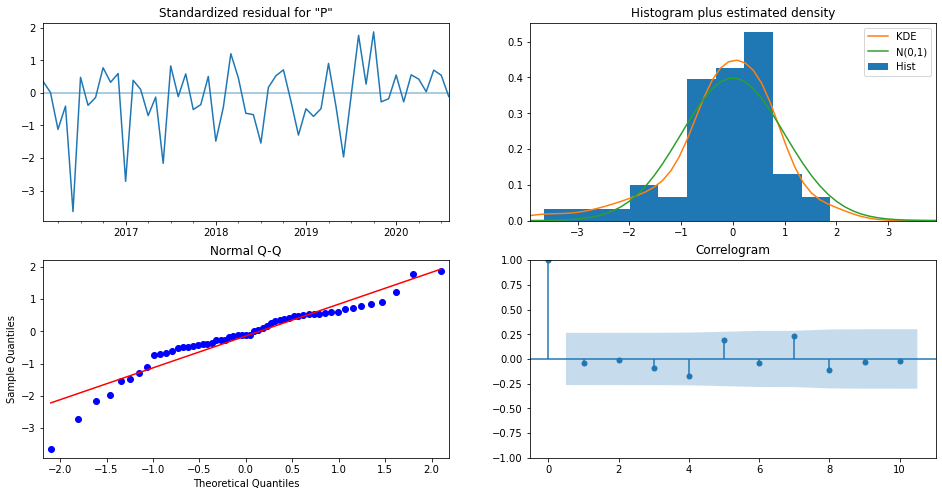

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating Forecasts

In [42]:
# We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

y.tail()

Date
2020-04-01    276.822222
2020-05-01    274.986842
2020-06-01    295.309091
2020-07-01    309.550000
2020-08-01    308.410000
Name: Price, dtype: float64

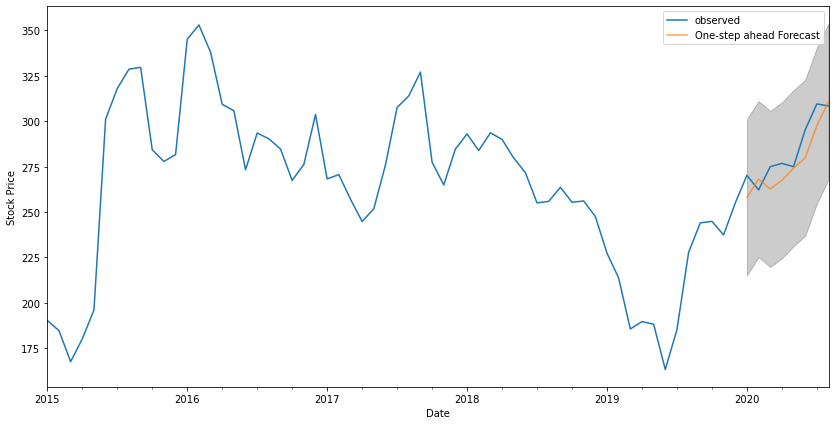

In [43]:
#set forecasts to start at 2020–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

#  Calculating MSE and RMSE

In [44]:
y['2020-01-01':]

Date
2020-01-01    270.260870
2020-02-01    262.197500
2020-03-01    274.985714
2020-04-01    276.822222
2020-05-01    274.986842
2020-06-01    295.309091
2020-07-01    309.550000
2020-08-01    308.410000
Name: Price, dtype: float64

In [45]:
pred.predicted_mean

2020-01-01    258.147598
2020-02-01    268.162717
2020-03-01    262.762225
2020-04-01    267.451476
2020-05-01    274.100561
2020-06-01    279.902479
2020-07-01    297.572462
2020-08-01    310.817003
Freq: MS, Name: predicted_mean, dtype: float64

In [46]:
pred.conf_int()

,lower Price,upper Price
2020-01-01,215.125873,301.169323
2020-02-01,225.204740,311.120695
2020-03-01,219.804978,305.719471
2020-04-01,224.494230,310.408723
2020-05-01,231.143315,317.057808
2020-06-01,236.945232,322.859725
2020-07-01,254.615215,340.529708
2020-08-01,267.859756,353.774249


In [47]:
from sklearn.metrics import mean_squared_error
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = mean_squared_error(pred.predicted_mean,y['2020-01-01':])
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 100.87
The Root Mean Squared Error of our forecasts is 10.04


In [48]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 100.87
The Root Mean Squared Error of our forecasts is 10.04


# Visualizing the Forecast

            lower Price  upper Price
2020-09-01   271.943967   357.858460
2020-10-01   227.693845   355.792672
2020-11-01   210.008571   370.113159
2020-12-01   199.547238   386.308874
2021-01-01   175.810446   385.878987
2021-02-01   155.812425   386.837919
2021-03-01   128.184121   378.417607
2021-04-01   117.923773   385.992457
2021-05-01   107.081930   391.871049
2021-06-01    84.284824   384.865703
2021-07-01    89.991755   405.575163
2021-08-01   109.595651   439.500046
2021-09-01   116.095017   458.275182
2021-10-01   102.197403   456.083914
2021-11-01    91.209221   456.411348
2021-12-01    97.841627   474.017371
2022-01-01    97.646609   484.484127
2022-02-01    83.858282   481.066215
2022-03-01    80.172192   487.486588
2022-04-01    75.899417   493.075510
2022-05-01    69.007549   495.817539
2022-06-01    71.563152   507.794332
2022-07-01    80.810282   526.263441
2022-08-01    85.495969   539.984024
2022-09-01    83.388455   559.630186
2022-10-01    54.627054   553.279729
2

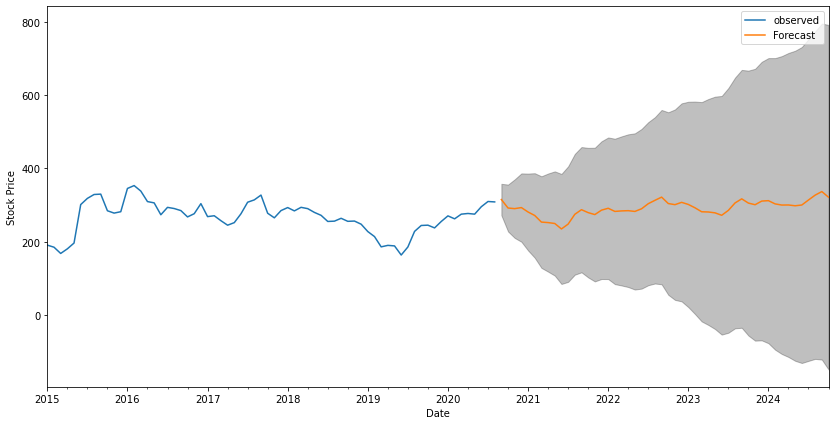

In [49]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
print(pred_ci)
plt.legend()
plt.show()